In [2]:
from google.colab import files
uploaded = files.upload()


Saving Train.csv to Train.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Train.csv")
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [23]:
print("Mean Cost:", df['Cost_of_the_Product'].mean())
print("Median Cost:", df['Cost_of_the_Product'].median())
print("Mode Cost:", df['Cost_of_the_Product'].mode()[0])
print("Std Deviation:", df['Cost_of_the_Product'].std())


Mean Cost: 210.19683607600692
Median Cost: 214.0
Mode Cost: 245
Std Deviation: 48.06327175153256


In [16]:
df['Cost_of_the_Product'].value_counts()
df['Weight_in_gms'].value_counts()
df['Weight_in_gms'].iloc[0:20]
df['Reached.on.Time_Y.N'].unique()

array([1, 0])

In [6]:
df['Cost_Level'] = pd.cut(
    df['Cost_of_the_Product'],
    bins=3,
    labels=["Low", "Medium", "High"]
)

df['Cost_Level'].value_counts()


,count
Cost_Level,
Medium,4581
High,3803
Low,2615


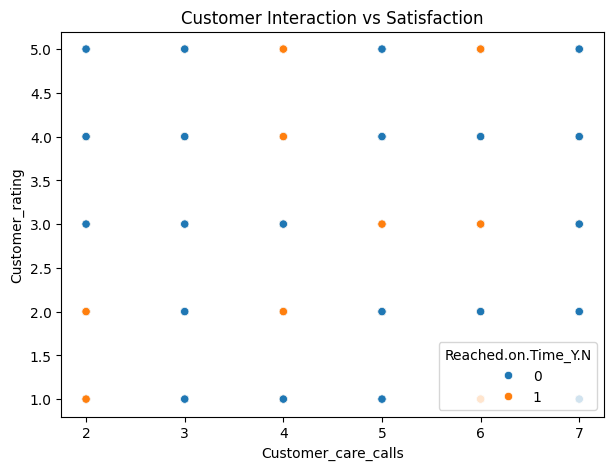

In [21]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df['Customer_care_calls'],
    y=df['Customer_rating'],
    hue=df['Reached.on.Time_Y.N']
)
plt.title("Customer Interaction vs Satisfaction")
plt.show()


In [10]:
discount_effect = df.groupby('Reached.on.Time_Y.N')['Discount_offered'].mean()
discount_effect


,Discount_offered
Reached.on.Time_Y.N,
0,5.545987
1,18.663721


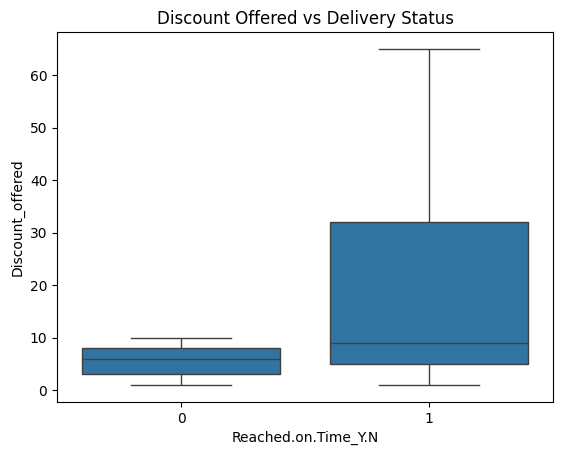

In [11]:
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=df)
plt.title("Discount Offered vs Delivery Status")
plt.show()


In [13]:
print("Pivot Table: Average Customer Rating")

pivot1 = df.pivot_table(
    values='Customer_rating',
    index='Warehouse_block',
    columns='Mode_of_Shipment',
    aggfunc='mean'
)

pivot1

Pivot Table: Average Customer Rating


Mode_of_Shipment,Flight,Road,Ship
Warehouse_block,,,
A,3.070707,2.812925,2.964573
B,2.996622,3.000000,2.971842
C,2.932203,3.068027,2.991158
D,2.818182,3.219178,3.018474
F,3.038851,2.936860,3.000804


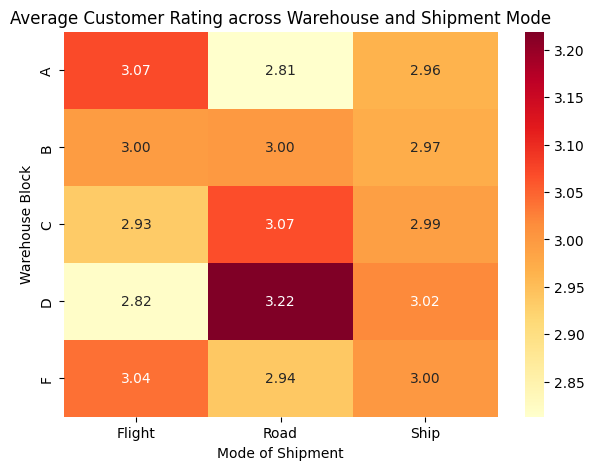

In [15]:
plt.figure(figsize=(7,5))

sns.heatmap(
    pivot1,
    annot=True,
    cmap='YlOrRd',
    fmt='.2f'
)

plt.title("Average Customer Rating across Warehouse and Shipment Mode")
plt.xlabel("Mode of Shipment")
plt.ylabel("Warehouse Block")

plt.show()
